## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0807 12:59:39.126665  5060 module_wrapper.py:136] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0807 12:59:39.184018  5060 module_wrapper.py:136] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\util\module_wrapper.py:163: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 12:59:39.291371  5060 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1423: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 4s 78us/step - loss: 1.9142 - acc: 0.3168 - val_loss: 1.7983 - val_acc: 0.3607
Epoch 2/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7189 - acc: 0.3928 - val_loss: 1.7438 - val_acc: 0.3721
Epoch 3/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6293 - acc: 0.4241 - val_loss: 1.6009 - val_acc: 0.4336
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5746 - acc: 0.4451 - val_loss: 1.6385 - val_acc: 0.4090
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5224 - acc: 0.4625 - val_loss: 1.5540 - val_acc: 0.4321
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4848 - acc: 0.4740 - val_loss: 1.5151 - val_acc: 0.4637
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4489 - acc: 0.4877 - val_loss: 1.5857 - val_acc: 0.4420
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9030 - acc: 0.3364 - val_loss: 1.8770 - val_acc: 0.3434
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8452 - acc: 0.3564 - val_loss: 1.8280 - val_acc: 0.3590
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8061 - acc: 0.3701 - val_loss: 1.7968 - val_acc: 0.3743
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7768 - acc: 0.3816 - val_loss: 1.7685 - val_acc: 0.3785
Epoch 7/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7516 - acc: 0.3891 - val_loss: 1.7441 - val_acc: 0.3885
Epoch 8/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7295 - acc: 0.3961 - val_loss: 1.7304 - val_acc: 0.3950
Epoch 9/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7099 - acc: 0.4046 - val_loss: 1.7097 - val_acc: 0.3991
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 4s 80us/step - loss: 2.1574 - acc: 0.2289 - val_loss: 2.1433 - val_acc: 0.2395
Epoch 5/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.1296 - acc: 0.2447 - val_loss: 2.1176 - val_acc: 0.2516
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1054 - acc: 0.2571 - val_loss: 2.0947 - val_acc: 0.2607
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0838 - acc: 0.2675 - val_loss: 2.0740 - val_acc: 0.2697
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0641 - acc: 0.2763 - val_loss: 2.0549 - val_acc: 0.2794
Epoch 9/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0459 - acc: 0.2843 - val_loss: 2.0372 - val_acc: 0.2860
Epoch 10/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.0292 - acc: 0.2902 - val_loss: 2.0216 - val_acc: 0.2970
Epoch 11/50
50000/50000 [==========================

Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.2883 - acc: 0.1326 - val_loss: 2.2840 - val_acc: 0.1439
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2808 - acc: 0.1386 - val_loss: 2.2771 - val_acc: 0.1494
Epoch 8/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2741 - acc: 0.1446 - val_loss: 2.2707 - val_acc: 0.1574
Epoch 9/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2679 - acc: 0.1518 - val_loss: 2.2647 - val_acc: 0.1639
Epoch 10/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2620 - acc: 0.1587 - val_loss: 2.2591 - val_acc: 0.1674
Epoch 11/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2564 - acc: 0.1631 - val_loss: 2.2536 - val_acc: 0.1728
Epoch 12/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.2509 - acc: 0.1685 - val_loss: 2.2482 - val_acc: 0.1780
Epoch 13/50
50000/50000 [=============

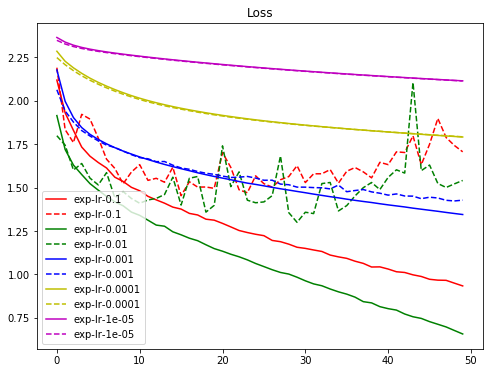

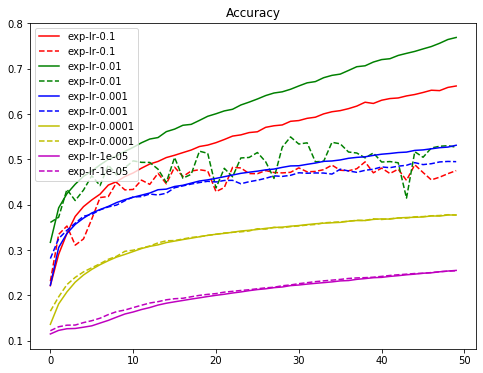

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
LEARNING_RATE = [1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()